# Práctica 2 — Campeonato de predicción

A continuación se presentan 6 escenarios distintos, 6 casos de estudio donde, dados unos datos y/o condiciones, se te pedirá que realices una estimación o predicción sobre una variable. 

Puedes utilizar los conceptos vistos en el curso para resolver alguno de los casos propuestos, pero te recomiendo que no te limites a los métodos estudiados en esta asignatura. La práctica tiene un alto componente exploratorio y de investigación, los problemas son deliberadamente abiertos y no estructurados para permitir varios enfoques. Sé creativo.

Para resolver esta práctica, puedes utilizar cualquier módulo externo, usar IAs para inspirarte, buscar problemas análogos online, etc. Todo está permitido. Eso sí, asegúrate de que justificas bien tus decisiones, en particular, los métodos o algoritmos que vas a usar para obtener cada una de las predicciones. Recuerda también citar tus fuentes.


### Instrucciones para la entrega

La práctica puede realizarse en grupos de dos personas como máximo. Debe subirse a Moodle antes de las **23:59 del 20 de Noviembre de 2024**. Aunque desarrolles la práctica en grupo, cada miembro del grupo debe realizar la entrega individualmente. Entrega este mismo documento (el ```ipynb```) relleno con tus argumentos y respuestas. En particular, asegúrate de que describes con precisión tu proceso exploratorio hasta llegar a la solución final propuesta. No valen respuestas del tipo "*He usado este algoritmo porque me lo ha dicho ChatGPT*". Debes experimentar con el método que propones, compararlo con otros, argumentar por qué funciona en el contexto planteado, por qué no has usado otros métodos, etc. En la entrega, incluye todas las pruebas que hagas, incluso con algoritmos o métodos que finalmente hayas descartado. Piensa en este *notebook* como una especie de *diario de investigación* donde vayas reflejando tus experimentos.

Además, debes rellenar la siguiente celda, para dejar claras tus predicciones para los 6 escenarios:

In [84]:
# RESPUESTAS: Predicciones/estimaciones. Rellena cada fila con un único valor numérico
# 1.
# 2.
# 3.
# 4.
# 5.
# 6.

### Evaluación

Se tendrán en cuenta las siguientes consideraciones a la hora de evaluar la práctica:
 1. Idoneidad de los método predictivos propuestos.
 2. Experimentación suficiente y rigurosa.
 3. Discusión crítica de resultados.
 4. Limpieza de código y estilo.
 5. Citas y referencias apropiadas.

Además, si resultas ganador del campeonato, obtendrás **1.5 puntos extra** en la nota de esta práctica (pudiendo obtener una nota superior a 10).

### Reglas del campeonato

Se evaluará cada caso independientemente. Para cada caso, se hará un ranking con todos los participantes, ordenándolos de menor a mayor error en las predicciones realizadas en comparación con el valor exacto. En cada caso, el primer clasificado obtendrá 5 puntos, el segundo 3 y el tercero 1. Ganará el campeonato el grupo que más puntos acumule en los 6 casos.

------------------
## Caso 1 — Serie temporal de una variable econométrica

El siguiente archivo ( ```csv```) contiene la evolución temporal de una variable econométrica:

[Descarga estos datos](https://drive.upm.es/s/to88gulrpHxLxjB/download)

Los datos incluyen dos columnas. La primera es una fecha (tiempo), y la segunda es el valor econométrico a estudiar. Crea un modelo predictivo y predice el valor de la variable econométrica a fecha 1 de enero de 2023.

In [85]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt


In [86]:
#leer csv

ruta_datos = "forecast_data.csv"
data = pd.read_csv(ruta_datos)

#Preprocesado de values


values = data['value'].values.reshape(-1, 1)
value_scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = value_scaler.fit_transform(values)

In [87]:
#Preprocesado de dates

data['date'] = pd.to_datetime(data['date'])
dates = data['date']

timpe_stamps = data.date.astype('int64').values.reshape(-1, 1)

date_scaler = MinMaxScaler(feature_range=(0, 1))
scaled_dates = date_scaler.fit_transform(timpe_stamps)

In [88]:
#generacion de matrices de entrenamiento

X = scaled_dates
y = scaled_values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [89]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# Configuración del modelo
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Capa de salida para un único valor de predicción
])

# Compilación del modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenamiento
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50


C:\Users\iocol\Desktop\ALN_practica_2\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2200 - mae: 0.4068 - val_loss: 0.1039 - val_mae: 0.2595
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1047 - mae: 0.2634 - val_loss: 0.0811 - val_mae: 0.2310
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0825 - mae: 0.2342 - val_loss: 0.0574 - val_mae: 0.1971
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0570 - mae: 0.1968 - val_loss: 0.0424 - val_mae: 0.1711
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0408 - mae: 0.1671 - val_loss: 0.0327 - val_mae: 0.1496
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0323 - mae: 0.1506 - val_loss: 0.0256 - val_mae: 0.1299
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0232 - mae: 0.1271 - val_loss: 0.0235 - val_mae: 0.1240
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0216 - mae: 0.1227 - val_loss: 0.0220 - val_mae: 0.1203
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0218 - mae: 0.1230 - va

In [90]:
# Evaluación del modelo
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Mean Absolute Error on Test Data: {mae}")

Mean Absolute Error on Test Data: 0.11908245831727982


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


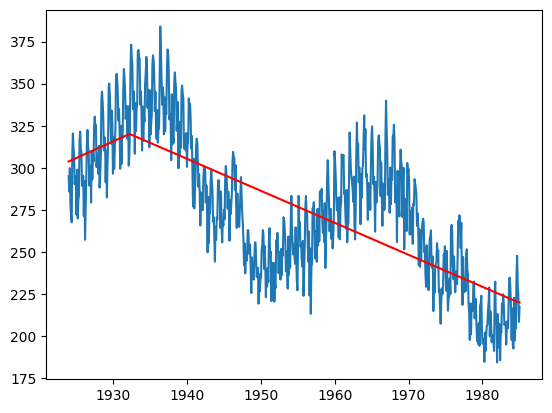

In [91]:
x_original = dates.values
y_original = values

plt.plot(x_original, y_original)
plt.plot(x_original, value_scaler.inverse_transform(model.predict(X)), "r")


In [92]:
def create_sequences(x, y, n_steps):
    sequences = []
    targets = []
    for i in range(len(data) - n_steps):
        seq = x[i:i + n_steps]
        target = y[i + n_steps]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

# Parámetro de longitud de la secuencia (ajusta según tus datos)
n_steps = 10  # Secuencia de 10 pasos para predecir el siguiente

# Crear secuencias para X y y
X_sequences, y_sequences = create_sequences(scaled_dates, scaled_values, n_steps)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_sequences, y_sequences, test_size=0.2, random_state=0
)

# Ajustar la forma para LSTM [samples, time_steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [93]:
# Crear el modelo LSTM
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(n_steps, 1)),  # Primera capa LSTM
    Dropout(0.2),  # Regularización
    LSTM(32, return_sequences=False),  # Segunda capa LSTM
    Dense(16, activation='relu'),  # Capa densa para procesar las características
    Dense(1)  # Salida para predecir un único valor
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenar el modelo
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=16,
    verbose=2
)

Epoch 1/50


C:\Users\iocol\Desktop\ALN_practica_2\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 - 2s - 67ms/step - loss: 0.1154 - mae: 0.2743 - val_loss: 0.0374 - val_mae: 0.1581
Epoch 2/50
37/37 - 0s - 6ms/step - loss: 0.0319 - mae: 0.1471 - val_loss: 0.0171 - val_mae: 0.1047
Epoch 3/50
37/37 - 0s - 5ms/step - loss: 0.0243 - mae: 0.1295 - val_loss: 0.0175 - val_mae: 0.1059
Epoch 4/50
37/37 - 0s - 5ms/step - loss: 0.0246 - mae: 0.1299 - val_loss: 0.0172 - val_mae: 0.1048
Epoch 5/50
37/37 - 0s - 5ms/step - loss: 0.0243 - mae: 0.1300 - val_loss: 0.0184 - val_mae: 0.1083
Epoch 6/50
37/37 - 0s - 5ms/step - loss: 0.0240 - mae: 0.1289 - val_loss: 0.0225 - val_mae: 0.1210
Epoch 7/50
37/37 - 0s - 5ms/step - loss: 0.0241 - mae: 0.1292 - val_loss: 0.0165 - val_mae: 0.1022
Epoch 8/50
37/37 - 0s - 5ms/step - loss: 0.0249 - mae: 0.1303 - val_loss: 0.0233 - val_mae: 0.1227
Epoch 9/50
37/37 - 0s - 5ms/step - loss: 0.0252 - mae: 0.1301 - val_loss: 0.0193 - val_mae: 0.1112
Epoch 10/50
37/37 - 0s - 5ms/step - loss: 0.0248 - mae: 0.1304 - val_loss: 0.0188 - val_mae: 0.1096
Epoch 11/50
37/37 -

In [94]:
import pandas as pd

# Generar la secuencia de fechas desde 1985-01-10 hasta 2024-01-01, cada primero de mes
start_date = "1985-01-10"
end_date = "2024-01-01"

# Generar las fechas usando pd.date_range
new_dates = pd.date_range(start=start_date, end=end_date, freq="ME")
timpe_stamps = new_dates.astype('int64').values.reshape(-1, 1)
new_scaled_dates = date_scaler.transform(timpe_stamps)

In [95]:
new_dates

DatetimeIndex(['1985-01-31', '1985-02-28', '1985-03-31', '1985-04-30',
               '1985-05-31', '1985-06-30', '1985-07-31', '1985-08-31',
               '1985-09-30', '1985-10-31',
               ...
               '2023-03-31', '2023-04-30', '2023-05-31', '2023-06-30',
               '2023-07-31', '2023-08-31', '2023-09-30', '2023-10-31',
               '2023-11-30', '2023-12-31'],
              dtype='datetime64[ns]', length=468, freq='ME')

In [96]:
def create_sequences(scaled_dates, n_steps):
    sequences = []
    for i in range(len(scaled_dates) - n_steps):
        seq = scaled_dates[i:i + n_steps]
        sequences.append(seq)
    return np.array(sequences)

In [97]:
reshaped_new_scaled_dates = create_sequences(new_scaled_dates, n_steps)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


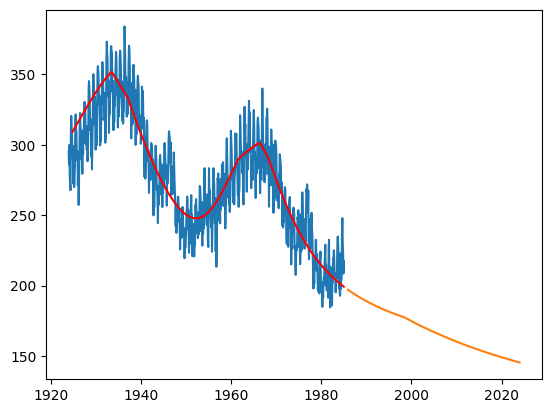

In [98]:
plt.plot(x_original, y_original)
plt.plot(x_original[n_steps:], value_scaler.inverse_transform(model.predict(X_sequences)), "r")
plt.plot(new_dates[n_steps:], value_scaler.inverse_transform(model.predict(reshaped_new_scaled_dates)))

------------------
## Caso 2 — Estimación de un área

En clase habrás recibido una hoja que contiene un área. La misma hoja contiene información sobre la escala. Realiza una estimación del área encerrada. 

------------------
## Caso 3 — Estimación funcional

Observa los siguientes pares de valores $x$, $y$. Predice cuál será el valor asociado a un $x=-0.16$

<center>

|      $x$      |     $y$      |
|-------------|------------|
|  0.808      | 1.081      |
|  0.087      | 3.166      |
| -0.359      | 1.801      |
| -0.281      | 1.949      |
|  0.257      | 2.024      |
|  0.279      | 1.979      |
|  0.604      | 1.275      |
| -0.303      | 1.880      |
|  0.722      | 1.126      |
| -0.760      | 1.130      |
|  0.407      | 1.627      |
|  0.215      | 2.247      |
| -0.912      | 1.081      |
|  0.013      | 5.006      |
| -0.972      | 1.032      |


</center>


In [99]:
import numpy as np
import pandas as pd
from scipy.interpolate import CubicSpline
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Datos proporcionados
x_vals = np.array([0.808, 0.087, -0.359, -0.281, 0.257, 0.279, 0.604, -0.303, 0.722, -0.760, 
                   0.407, 0.215, -0.912, 0.013, -0.972])
y_vals = np.array([1.081, 3.166, 1.801, 1.949, 2.024, 1.979, 1.275, 1.880, 1.126, 1.130,
                   1.627, 2.247, 1.081, 5.006, 1.032])

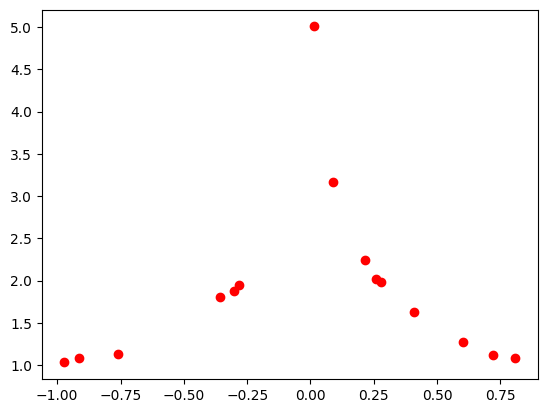

In [100]:
plt.plot(x_vals, y_vals, "ro")


In [101]:
import pandas as pd

df = pd.DataFrame({"y_vals": y_vals, "x_vals": x_vals})


In [102]:
grado_minimo_negativo = 5

for i in range(2, grado_minimo_negativo + 1):
    print(i)
    df[f"x_vals_{i}"] = abs(df["x_vals"] ** -i)
    

2
3
4
5


In [103]:
df

,y_vals,x_vals,x_vals_2,x_vals_3,x_vals_4,x_vals_5
0,1.081,0.808,1.531713,1.895684,2.346143e+00,2.903643e+00
1,3.166,0.087,132.117849,1518.595967,1.745513e+04,2.006336e+05
2,1.801,-0.359,7.759096,21.613080,6.020356e+01,1.676980e+02
3,1.949,-0.281,12.664480,45.069324,1.603891e+02,5.707795e+02
4,2.024,0.257,15.140275,58.911574,2.292279e+02,8.919374e+02
5,1.979,0.279,12.846700,46.045521,1.650377e+02,5.915330e+02
6,1.275,0.604,2.741108,4.538258,7.513672e+00,1.243985e+01
7,1.880,-0.303,10.892178,35.947783,1.186395e+02,3.915497e+02
8,1.126,0.722,1.918340,2.656981,3.680029e+00,5.096993e+00
9,1.130,-0.760,1.731302,2.278029,2.997406e+00,3.943956e+00


In [104]:
df.columns

Index(['y_vals', 'x_vals', 'x_vals_2', 'x_vals_3', 'x_vals_4', 'x_vals_5'], dtype='object')

In [105]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

X = df.iloc[:, 1:].values
y = df[['y_vals']].values

regressor.fit(X, y)

LinearRegression()

In [106]:
regressor.coef_

array([[-1.27927338e-02,  2.20917212e-01, -4.66418095e-02,
         2.86105962e-03, -2.97951205e-05]])

In [107]:
def x_procesada(x):
    return [x ** -i for i in range(2, grado_minimo_negativo + 1)]

x_procesada = np.array([0.808] + x_procesada(0.808)).reshape((1, -1)).tolist()
print(regressor.predict(x_procesada))
print(1.081)

valor = 0

for i in range(len(x_procesada)):
    valor += abs(x_procesada[0][i] * regressor.coef_[0][i])
print(regressor.intercept_)
    
print(valor)


[[1.09425458]]
1.081
[0.84800162]
0.01033652889288953


(0.0, 5.0)

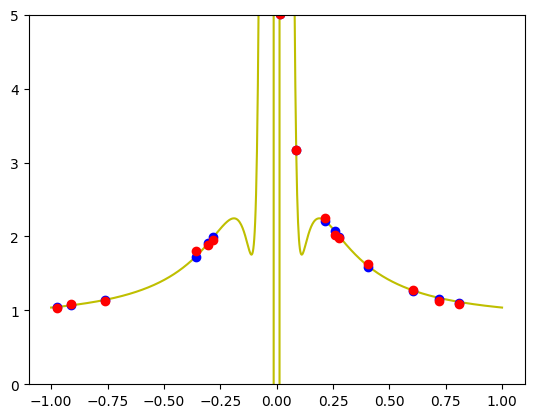

In [108]:
def fun(x):
    resultado = abs(regressor.coef_[0][0] * x)
    for i, coef in enumerate(regressor.coef_[0][1:]):
        resultado += coef * abs(x ** (-(2 + i)))
        
    return resultado + regressor.intercept_

v_fun = np.vectorize(fun)
        
x_plot = np.linspace(-1, 1, 1000)
y_plot = list(map(fun, x_plot))

plt.plot(x_plot, y_plot, "y")
plt.plot(x_vals, regressor.predict(X), "bo")
plt.plot(x_vals, y_vals, "ro")
plt.ylim([0, 5])

In [109]:
regressor.coef_

array([[-1.27927338e-02,  2.20917212e-01, -4.66418095e-02,
         2.86105962e-03, -2.97951205e-05]])

In [110]:
# Datos proporcionados
x_vals = np.array([0.808, 0.087, -0.359, -0.281, 0.257, 0.279, 0.604, -0.303, 0.722, -0.760, 
                   0.407, 0.215, -0.912, 0.013, -0.972])
y_vals = np.array([1.081, 3.166, 1.801, 1.949, 2.024, 1.979, 1.275, 1.880, 1.126, 1.130,
                   1.627, 2.247, 1.081, 5.006, 1.032])

In [111]:
x_vals, y_vals = np.array(sorted(zip(x_vals, y_vals), key = lambda x: x[0])).T

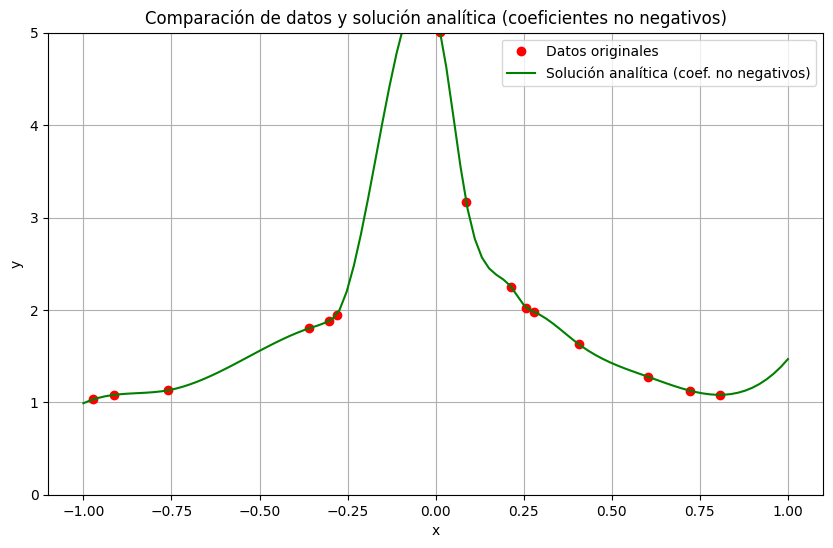

In [112]:
from scipy.interpolate import CubicSpline

splines = CubicSpline(x_vals, y_vals)

x_plot = np.linspace(-1, 1, 100)
y_analitica = splines(x_plot)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, "ro", label="Datos originales")
plt.plot(x_plot, y_analitica, "g-", label="Solución analítica (coef. no negativos)")
plt.ylim([0, 5])
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Comparación de datos y solución analítica (coeficientes no negativos)")
plt.grid(True)
plt.show()

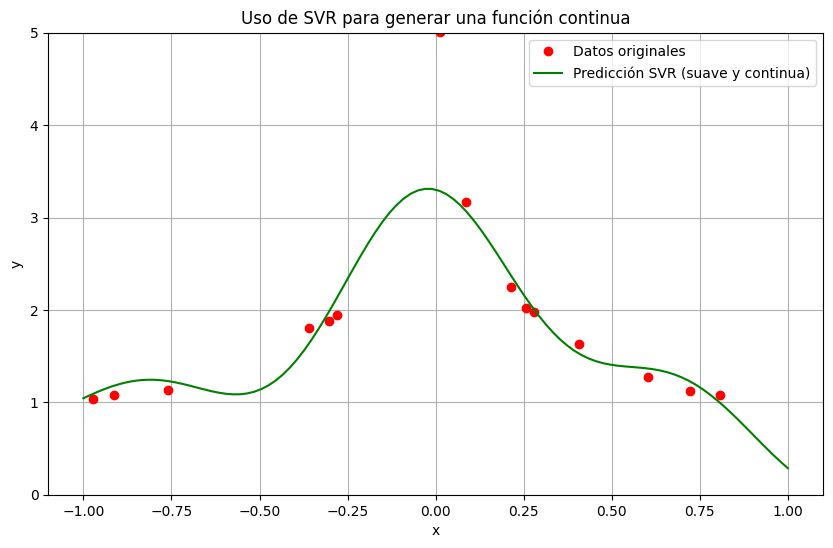

In [113]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# Datos proporcionados
x_vals = np.array([0.808, 0.087, -0.359, -0.281, 0.257, 0.279, 0.604, -0.303, 0.722, -0.760, 
                   0.407, 0.215, -0.912, 0.013, -0.972])
y_vals = np.array([1.081, 3.166, 1.801, 1.949, 2.024, 1.979, 1.275, 1.880, 1.126, 1.130,
                   1.627, 2.247, 1.081, 5.006, 1.032])

# Crear DataFrame
df = pd.DataFrame({"y_vals": y_vals, "x_vals": x_vals})

# Preprocesar los datos para el modelo SVR
X = df[['x_vals']].values
y = df['y_vals'].values

# Ajustar el modelo SVR (Se usa un kernel RBF para suavizar la función)
svr = SVR(kernel='rbf', C=100, epsilon=0.1)

# Ajuste del modelo SVR
svr.fit(X, y)

# Generar valores predichos por el modelo para un rango más amplio de x
x_plot = np.linspace(-1, 1, 100).reshape(-1, 1)
y_svr = svr.predict(x_plot)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, "ro", label="Datos originales")  # Puntos originales
plt.plot(x_plot, y_svr, "g-", label="Predicción SVR (suave y continua)")  # Predicción suave
plt.ylim([0, 5])
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Uso de SVR para generar una función continua")
plt.grid(True)
plt.show()

In [114]:
from scipy.optimize import curve_fit

def modelo(x, a, b, c):
    return a * np.exp(-b * np.abs(x)) + c

parametros_ini = [5, 1, 1]  # Suposición inicial de los parámetros
parametros_optimos, covarianza = curve_fit(modelo, x_vals, y_vals, p0=parametros_ini)

a_opt, b_opt, c_opt = parametros_optimos
print(f"a = {a_opt} b = {b_opt} c = {c_opt}")

x_pred = -0.16
y_pred = modelo(x_pred, a_opt, b_opt, c_opt)
print(f"x = {x_pred} y = {y_pred:.3f}")

a = 3.9936864246674784 b = 5.662535747794341 c = 1.10212398501903
x = -0.16 y = 2.716


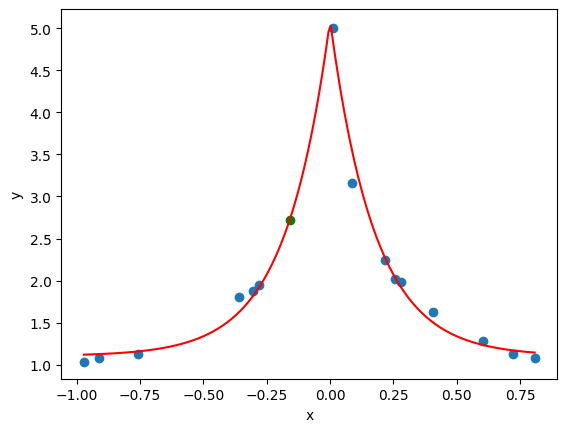

In [115]:
x_ajuste = np.linspace(min(x_vals), max(x_vals), 200)
y_ajuste = modelo(x_ajuste, a_opt, b_opt, c_opt)

plt.scatter(x_vals, y_vals)
plt.plot(x_ajuste, y_ajuste, color='red',)
plt.scatter(x_pred, y_pred, color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


------------------
## Caso 4 — Subasta de 5€

El día 28 de noviembre, en clase subastaré un billete de 5€. La subasta tiene unas normas un poco especiales:
 - El objetivo es pujar para ganar un billete de 5€.
 - El ganador recibirá 5€, pero a diferencia de las subastas "normales", **tanto el ganador como el subcampeón deberán pagar la cantidad de sus ofertas**.
 - Las ofertas deben aumentarse en incrementos mínimos de 20 céntimos.
 - No hay límites en la cantidad de rondas de pujas.

Ejemplo: imagina que el grupo A comienza la puja por 20 céntimos. El grupo B sube la puja a 40 céntimos. El grupo A vuelve a subir la puja a 80 céntimos. Ahora el grupo C sube la puja a 1€ y 40 céntimos. No hay más pujas: el grupo B paga 80 céntimos. El grupo C paga 1€ y 40 céntimos, y recibe el billete de 5€.

Si no pujas, no pierdes nada, y puedes ganar 5€ por una pequeña cantidad. Esto quiere decir que el [valor esperado](https://en.wikipedia.org/wiki/Expected_value) del juego es positivo, lo que significa que es rentable jugar.

En el contexto de esta práctica, tu objetivo será **predecir la suma de las dos ofertas más altas** de la subasta.

# Análisis del Problema desde el Punto de Vista del Valor Esperado

Vamos a analizar el problema desde el punto de vista del valor esperado, una parámetro analíticamente equivalente a la medio, que estima lo que ganarías de media jugando esta estrategia interactivamente, (solo vamos a hacer una subasta, pero creemos que tiene sentido plantear lo siguiente).

Sea \( X \) la apuesta que se hace. Solo se apuesta si:

$$
\text{Valor esperado} > \text{Pérdida esperada}
$$

Es decir, debemos garantizar que nuestra estrategia sea viable a largo plazo. Esto se cumple si el valor esperado compensa las posibles pérdidas. Planteamos las siguientes expresiones:

$$
\text{Valor esperado} = P_{\text{ganar}}(X) \cdot (5 - X)
$$

$$
\text{Pérdida esperada} = P_{\text{perder}}(X) \cdot X
$$

## Desarrollo de la desigualdad:

La condición para apostar se escribe como:

$$
P_{\text{ganar}}(X) \cdot (5 - X) > P_{\text{perder}}(X) \cdot X
$$

Distribuyendo y reorganizando los términos:

$$
5 \cdot P_{\text{ganar}}(X) - P_{\text{ganar}}(X) \cdot X > P_{\text{perder}}(X) \cdot X
$$

Factorizamos \( X \) en los términos correspondientes:

$$
5 \cdot P_{\text{ganar}}(X) > X \cdot \big(P_{\text{perder}}(X) + P_{\text{ganar}}(X)\big)
$$

Dividimos ambos lados por \( P_{\text{ganar}}(X) + P_{\text{perder}}(X) \), suponiendo que esta cantidad es positiva:

$$
X < \frac{5 \cdot P_{\text{ganar}}(X)}{P_{\text{ganar}}(X) + P_{\text{perder}}(X)}
$$

## Extraccion de conclusiones:

Ahora tenemos una expresión analítica de la cota superior de X, sin embargo no conocemos las funciones de densidad de probabilidad, que estiman la probabilidad de ganar o de perder en función de la cantidad apostada.

Para encontrar esta cota superior, planteamos dos posibles métodos:

1. Encontrar una relación analitítica entre $$P_{\text{ganar}}(X)\ y \ P_{\text{perder}}(X) $$.
2. Estimar que funciones deberían de seguir estas funciones de densidad.

### Vamos a desarrollar el primer metodo:

Creemos que puede tener sentido plantear la siguiente relación $$P_{\text{ganar}}(X)\ = \ P_{\text{perder}}(X) $$ Con el objetivo de modelar un escernario el que todo el mundo juega de manera optima da tal manera que la probabilidad de ganar es igual a la probabilidad de perder, es decir quedar primero o segundo. Con esto podemos resolver para la cota superior de X.

$$
X < \frac{1}{2} \cdot 5 = 2.5
$$

Es decir las las apuestas de los jugadores deben estar acotadas superiormente por 2.50 euros.


Sin embargo es posible que asumir esto sea demasiado restrictivo, por lo que desarrollaremos el segundo método para comparar resultados.

Podemos asumir varias cosas de las funciones de densidad.

- Debe existir una relacion entre ambas ya que la $ P_{\text{perder}}(X) $ mia debe ser igual a la $ P_{\text{ganar}}(X + incremento) $ de el jugador que me gane, ya que solo pierdo si un jugador apuesta mas que yo y nadie apuesta mas que el.
- vamos a fijar este incremente como 0.20 asumiendo de este modo que la diferencias en las apuestas de el que gana y el que pierde es del incremento mínimo algo que es muy común en las subastas.
- Entonces conseguirmos expresar $ P_{\text{perder}}(X) = P_{\text{ganar}}(X + 0.20)$ 
- Se debe alcanzar la probabilidad de cero si se apuesta 0 y la probabilidad de 1 si se apuestan 5 euros, asumiendo que nadie va a apostar teniendo la garantia de perder dinero.



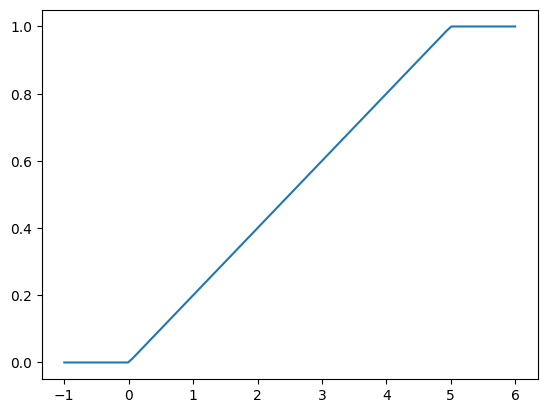

In [116]:
import matplotlib.pyplot as plt
import numpy as np

def p_ganar_lineal(x):
    if x < 0:
        return 0
    if 0 <= x <= 5:
        return x / 5
    else:
        return 1
    
plt.plot(np.linspace(-1, 6, 100), list(map(p_ganar_lineal, np.linspace(-1, 6, 100))))

In [117]:
from scipy.optimize import root

# Función P_perder
def p_perder(x, p_ganar):
    return p_ganar(x + 0.2)

# Calcular la cota superior
def cota_superior_apuesta(p_ganar):
    # La función objetivo que queremos anular
    def fun(x):
        return (5 * p_ganar(x)) / (p_ganar(x) + p_perder(x, p_ganar)) - x

    # Resolver la raíz
    sol = root(fun, x0=[1])  # x0 es el punto inicial
    return sol

def printear_cota_superior(p_ganar):

    # Llamada a la función
    resultado = cota_superior_apuesta(p_ganar)
    
    # Imprimir el resultado
    if resultado.success:
        print(f"Cota superior encontrada: {resultado.x[0]}")
    else:
        print("No se encontró una solución.")

proponemos otra funcion que quizas se aguste mas a la real, a la cual llegamos jugando con interoplacion de legrange en geogebra.

<img src="img.png">

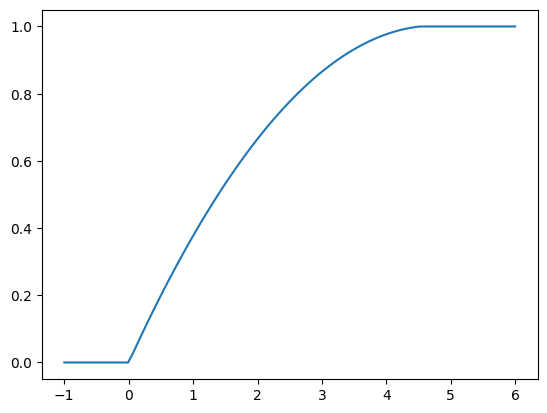

In [118]:
def p_ganar_personalizado(x):
    def expr(x):
        a, b = 13, -2
        return (x * (x - a)) / (5 * (5 - a)) + b * (x * (x - 5)) / (a * (a - 5))
    if x < 0:
        return 0
    if 0 <= x <= 5:
        valor = expr(x)
        
        if valor >= 1:
            return 1
        else:
            return valor
    else:
        return 1
    
plt.plot(np.linspace(-1, 6, 100), list(map(p_ganar_personalizado, np.linspace(-1, 6, 100))))

In [119]:
printear_cota_superior(p_ganar_personalizado)

Cota superior encontrada: 2.437225210369047


## Solucion propuesta:
Los tres métodos han llegado a resultados muy cercanos, nos vamos a quedar con la últimas de las soluciones y vamos a decir que última puja será de 2.40 y como estamos asumiendo una diferencia de 20 céntimos entre esta y la penúltima, el resultado final es de 4.60 euros que se pagaran por el billete.

------------------
## Caso 5 — Experimento físico

En clase se describirá un experimento físico que se llevará a cabo el día 28 de noviembre. Presta atención a los datos dados y a la variable a predecir.


------------------
## Caso 6 — Predicción deportiva

El fin de semana del 29 Nov - 1 Dic se juega el partido O. Lyon vs Niza (*Ligue 1*, Francia). Tu objetivo es predecir el **número de corners que sacará el Niza** en ese partido. Tienes a tu disposición muchos datos históricos, por ejemplo en [esta web](https://www.football-data.co.uk/data.php).